In [1]:
from typing import Union
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import numpy as np
from sklearn.metrics import mean_squared_error
import math

In [2]:
def load_dataset(file_path: str) -> Union[pd.DataFrame, None]:
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Unable to parse file '{file_path}'. Please check the file format.")
        return None

    return df

In [3]:
def convert(word):
    return ''.join(x.capitalize() or '_' for x in word.split('_'))

In [4]:
def statistical_measure(data_column_1: pd.DataFrame , data_column_2: pd.DataFrame):
    correlation_pearson, _ = pearsonr(data_column_1.values, data_column_2.values)
    correlation_spearman, _ = spearmanr(data_column_1.values, data_column_2.values)

    mse = mean_squared_error(data_column_1.values, data_column_2.values)

    relative_difference = np.mean(np.abs(data_column_1.values - data_column_2.values) / np.mean([data_column_1.values, data_column_2.values]) * 100)

    return correlation_pearson, correlation_spearman, mse, relative_difference

def extend_legend(ax, df_1, df_2, data_column):
    min_length = min(len(df_1), len(df_2))

    df_1 = df_1.iloc[:min_length, :]
    df_2 = df_2.iloc[:min_length, :]
    df_1_desc = df_1[data_column].describe()
    df_2_desc = df_2[data_column].describe()

    correlation_pearson, correlation_spearman, mse, relative_difference = statistical_measure(df_1[data_column], df_2[data_column])
    ax.plot([], [], ' ', label=f"Correlation Pearson: {round(correlation_pearson, 3)}")
    ax.plot([], [], ' ', label=f"Correlation Spearman: {round(correlation_spearman, 3)}")
    ax.plot([], [], ' ', label=f"MSE: {round(mse, 3)}")
    ax.plot([], [], ' ', label=f"Relative Difference: {round(relative_difference, 3)}")

    ax.plot([], [], ' ', label=f"Mean Cpp: {round(df_1_desc['mean'],3)}")
    ax.plot([], [], ' ', label=f"Std Cpp: {round(df_1_desc['std'],3)}")
    ax.plot([], [], ' ', label=f"Min Cpp: {round(df_1_desc['min'],3)}")
    ax.plot([], [], ' ', label=f"Max Cpp: {round(df_1_desc['max'],3)}")

    ax.plot([], [], ' ', label=f"Mean Python: {round(df_2_desc['mean'],3)}")
    ax.plot([], [], ' ', label=f"Std Python: {round(df_2_desc['std'],3)}")
    ax.plot([], [], ' ', label=f"Min Python: {round(df_2_desc['min'],3)}")
    ax.plot([], [], ' ', label=f"Max Python: {round(df_2_desc['max'],3)}") 

In [5]:
blue_palette = ['#00008B']
warm_palette = ['#ee092d']

def plot_dataframe(ax, file_path: str, data_column, label: str=None):
    df = load_dataset(file_path)[['simulation_time', data_column]]

    row = df[df['simulation_time']>=10].index.tolist()
    if row != []:
        df = df.iloc[:row[0]-1] 

    min_value = df[data_column].min()
    df[data_column] -= min_value

    color = blue_palette if 'cpp' in label else warm_palette
    ax.plot(df.iloc[:, 0], df.iloc[:, 1], label=label, color=random.choice(color))
    
    return df

def plot_dataframe_dataload(ax, file_path: str,  data_colum: str, label: str=None, shift=False):
    df = load_dataset(file_path)[['simulation_time', data_colum]]

    row = df[df[data_colum]>0].index.tolist()
    if row != []:
        df = df.iloc[row[0]-1:] 

    if shift:
        min_value = df['simulation_time'].min()
        df['simulation_time'] -= min_value

    row = df[df['simulation_time']>=10].index.tolist()
    if row != []:
        df = df.iloc[:row[0]-1] 

    color = blue_palette if 'cpp' in label else warm_palette
    ax.plot(df.loc[:, 'simulation_time'], df.loc[:, data_colum], label=label, color=random.choice(color))

    return df

/tmp/ipykernel_23203/4266336897.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_23203/4266336897.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_23203/4266336897.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_23203/4266336897.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_23203/4266336897.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_23203/4266336897.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fil

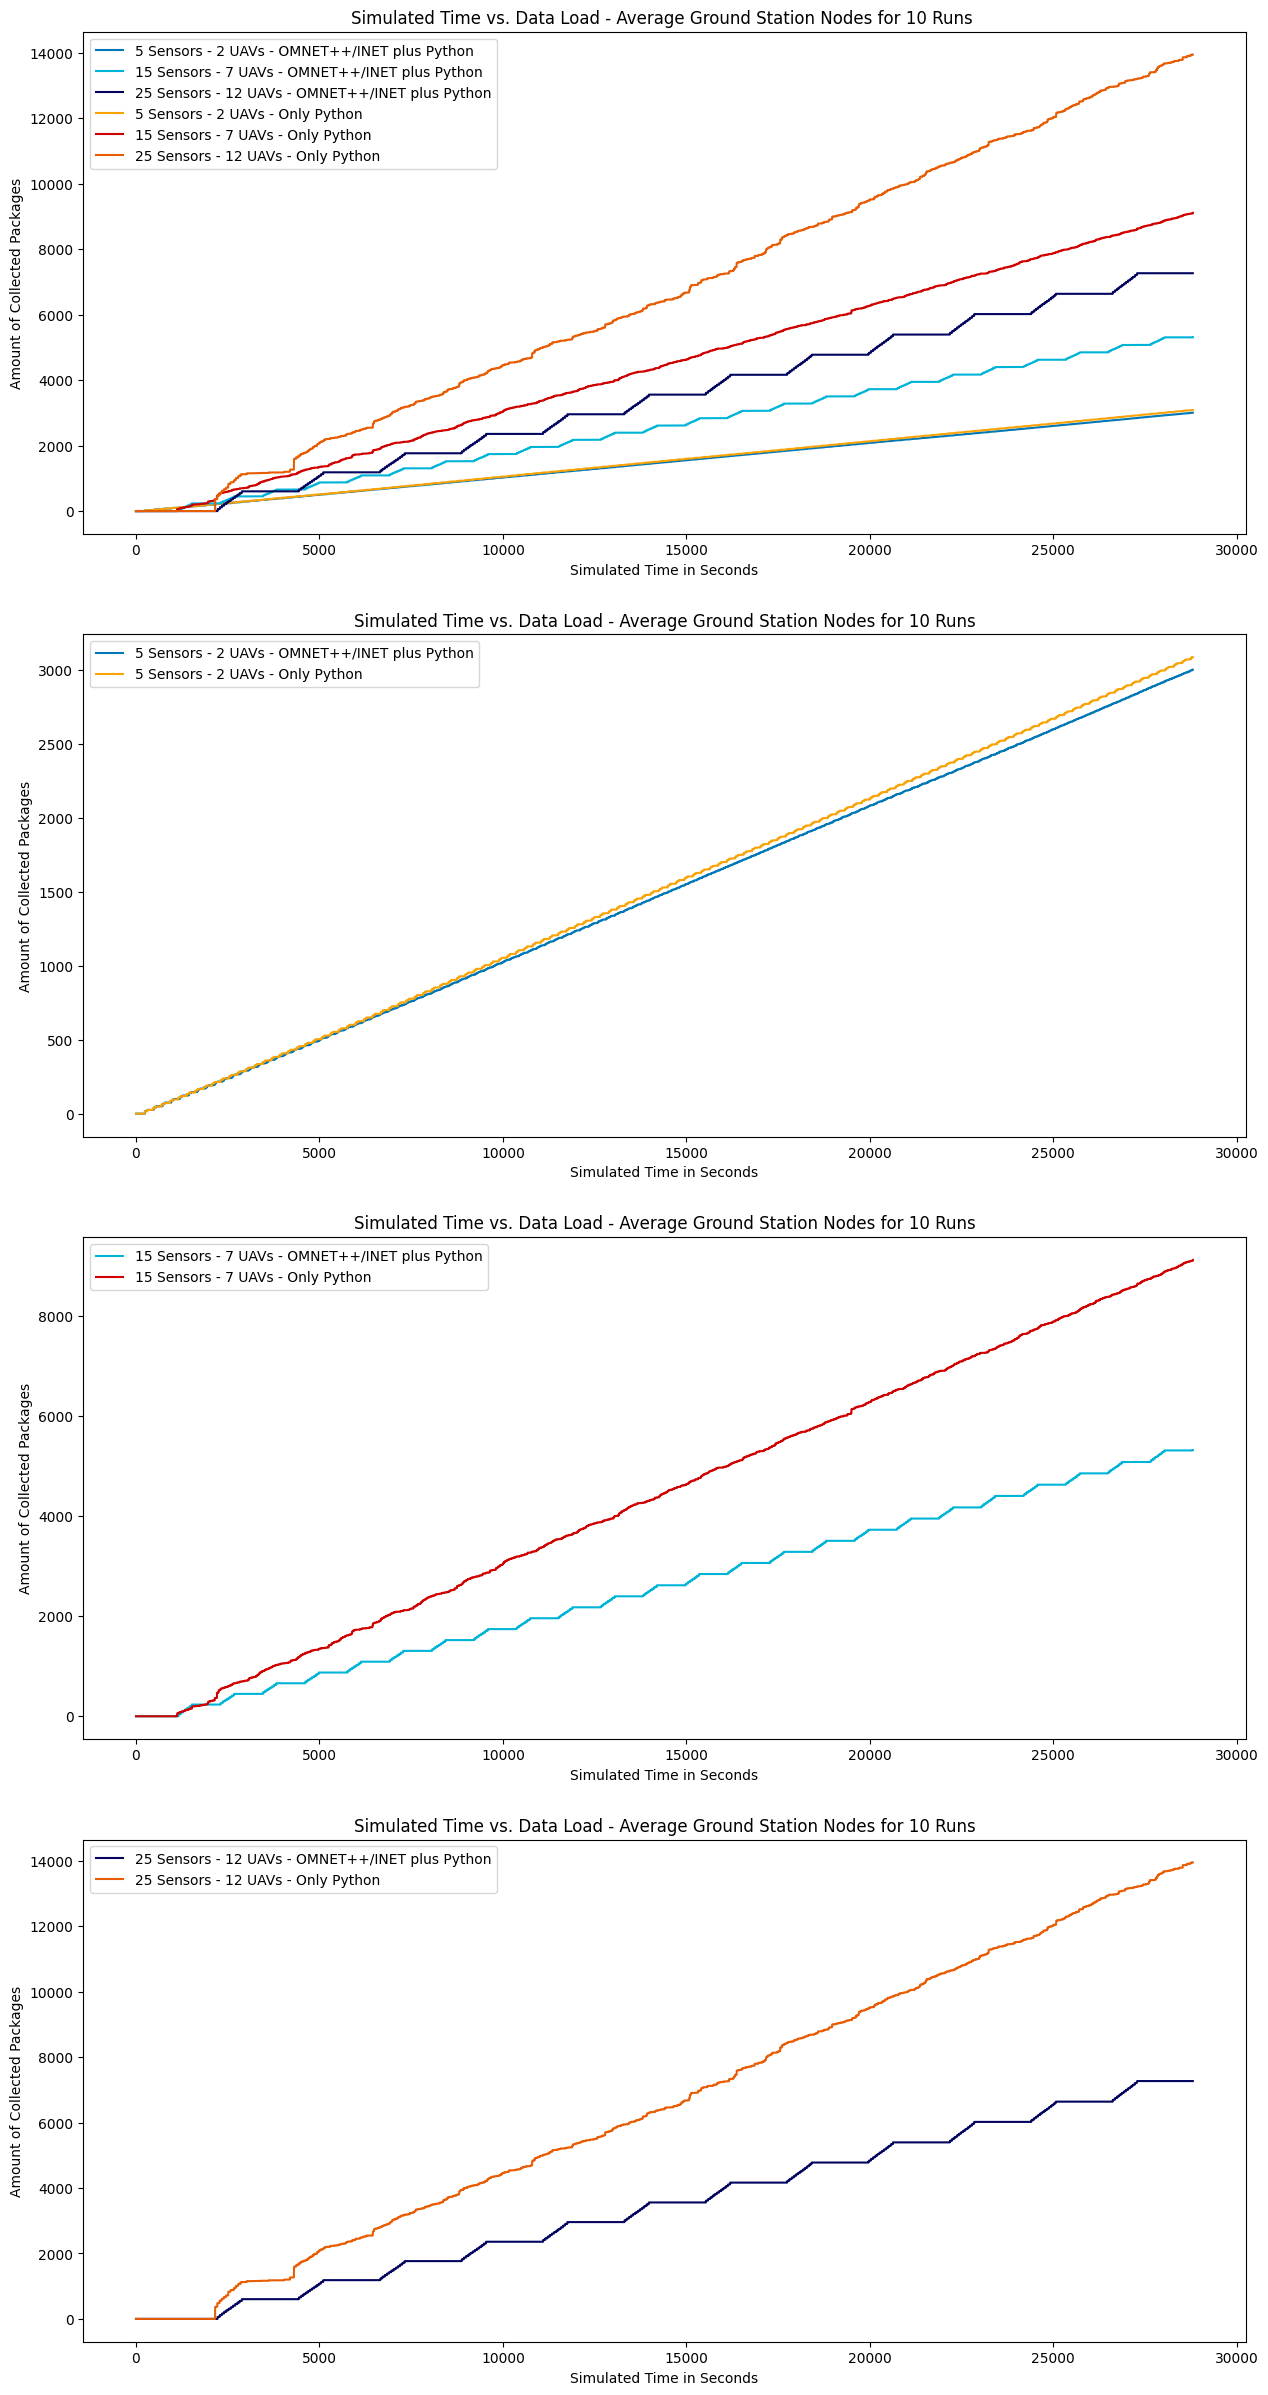

In [6]:
blue_palette = ['#0077b6', '#00b4d8','#03045e']
warm_palette = ['#faa307', '#d00000', '#e85d04']

fig1, axs1 = plt.subplots(4,1, figsize=(15, 30))
folders = ["python", "cpp"]
paths = [5, 15, 25]
data_columns = ["current_data_load"]
rounds = [1,2,3,4,5,6,7,8,9,10]

ground_ids = {
    "python" : [2, 7, 12],
    "cpp" : [13, 28, 43],
}

for idx_path, path in enumerate(paths):

    dfs = {
        "cpp" : pd.DataFrame(),
        "python" : pd.DataFrame(),
    }

    for idx_folder, folder in enumerate(folders):
        for idx_data_column, data_column in enumerate(data_columns):
            for round in rounds:
            
                base_file_path = f"./results/{folder}/{path}/{round}/tracked_variables__ZigZagProtocolGround_"

                ground_id = ground_ids[folder][idx_path]
                # Load dataset and rename for merge
                tmp_df = load_dataset(base_file_path + f"{ground_id}.csv")[['simulation_time', data_column]]
                tmp_df = tmp_df.rename(columns={data_column: f"{data_column}_{round}"})

                if path == 5:
                    tmp_df = tmp_df.iloc[:288001]

                # Merge
                dfs[folder] = tmp_df if len(dfs[folder]) == 0 else pd.merge(dfs[folder], tmp_df, on='simulation_time', how='inner')


    for idx_folder, folder in enumerate(folders):
        columns = []
        for round in rounds:
            columns.append(f"current_data_load_{round}")
        
        average_series = dfs[folder][columns].mean(axis=1)
        dfs[folder]['average'] = average_series

    for key, items in dfs.items():
        color = blue_palette if 'cpp' in key else warm_palette

        label = f"{path} Sensors - {math.floor(path/2)} UAVs - {'OMNET++/INET plus Python' if key == 'cpp' else 'Only Python'}"
        # Create a combined graph
        axs1[0].plot(items.loc[:, 'simulation_time'], items.loc[:, 'average'], label=label, color=color[idx_path])
        
        if idx_path == 0:
            axs1[0].set_title(f'Simulated Time vs. Data Load - Average Ground Station Nodes for 10 Runs ')
            axs1[0].set_xlabel('Simulated Time in Seconds')
            axs1[0].set_ylabel('Amount of Collected Packages')

        # Create a graph for each individually
        axs1[idx_path + 1].plot(items.loc[:, 'simulation_time'], items.loc[:, 'average'], label=label, color=color[idx_path])
        axs1[idx_path + 1].set_title(f'Simulated Time vs. Data Load - Average Ground Station Nodes for 10 Runs')
        
        axs1[idx_path + 1].set_xlabel('Simulated Time in Seconds')
        axs1[idx_path + 1].set_ylabel('Amount of Collected Packages')
        axs1[idx_path + 1].legend()

axs1[0].legend()

handles, labels = axs1[0].get_legend_handles_labels()
order = [0,2,4,1,3,5]
axs1[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order])

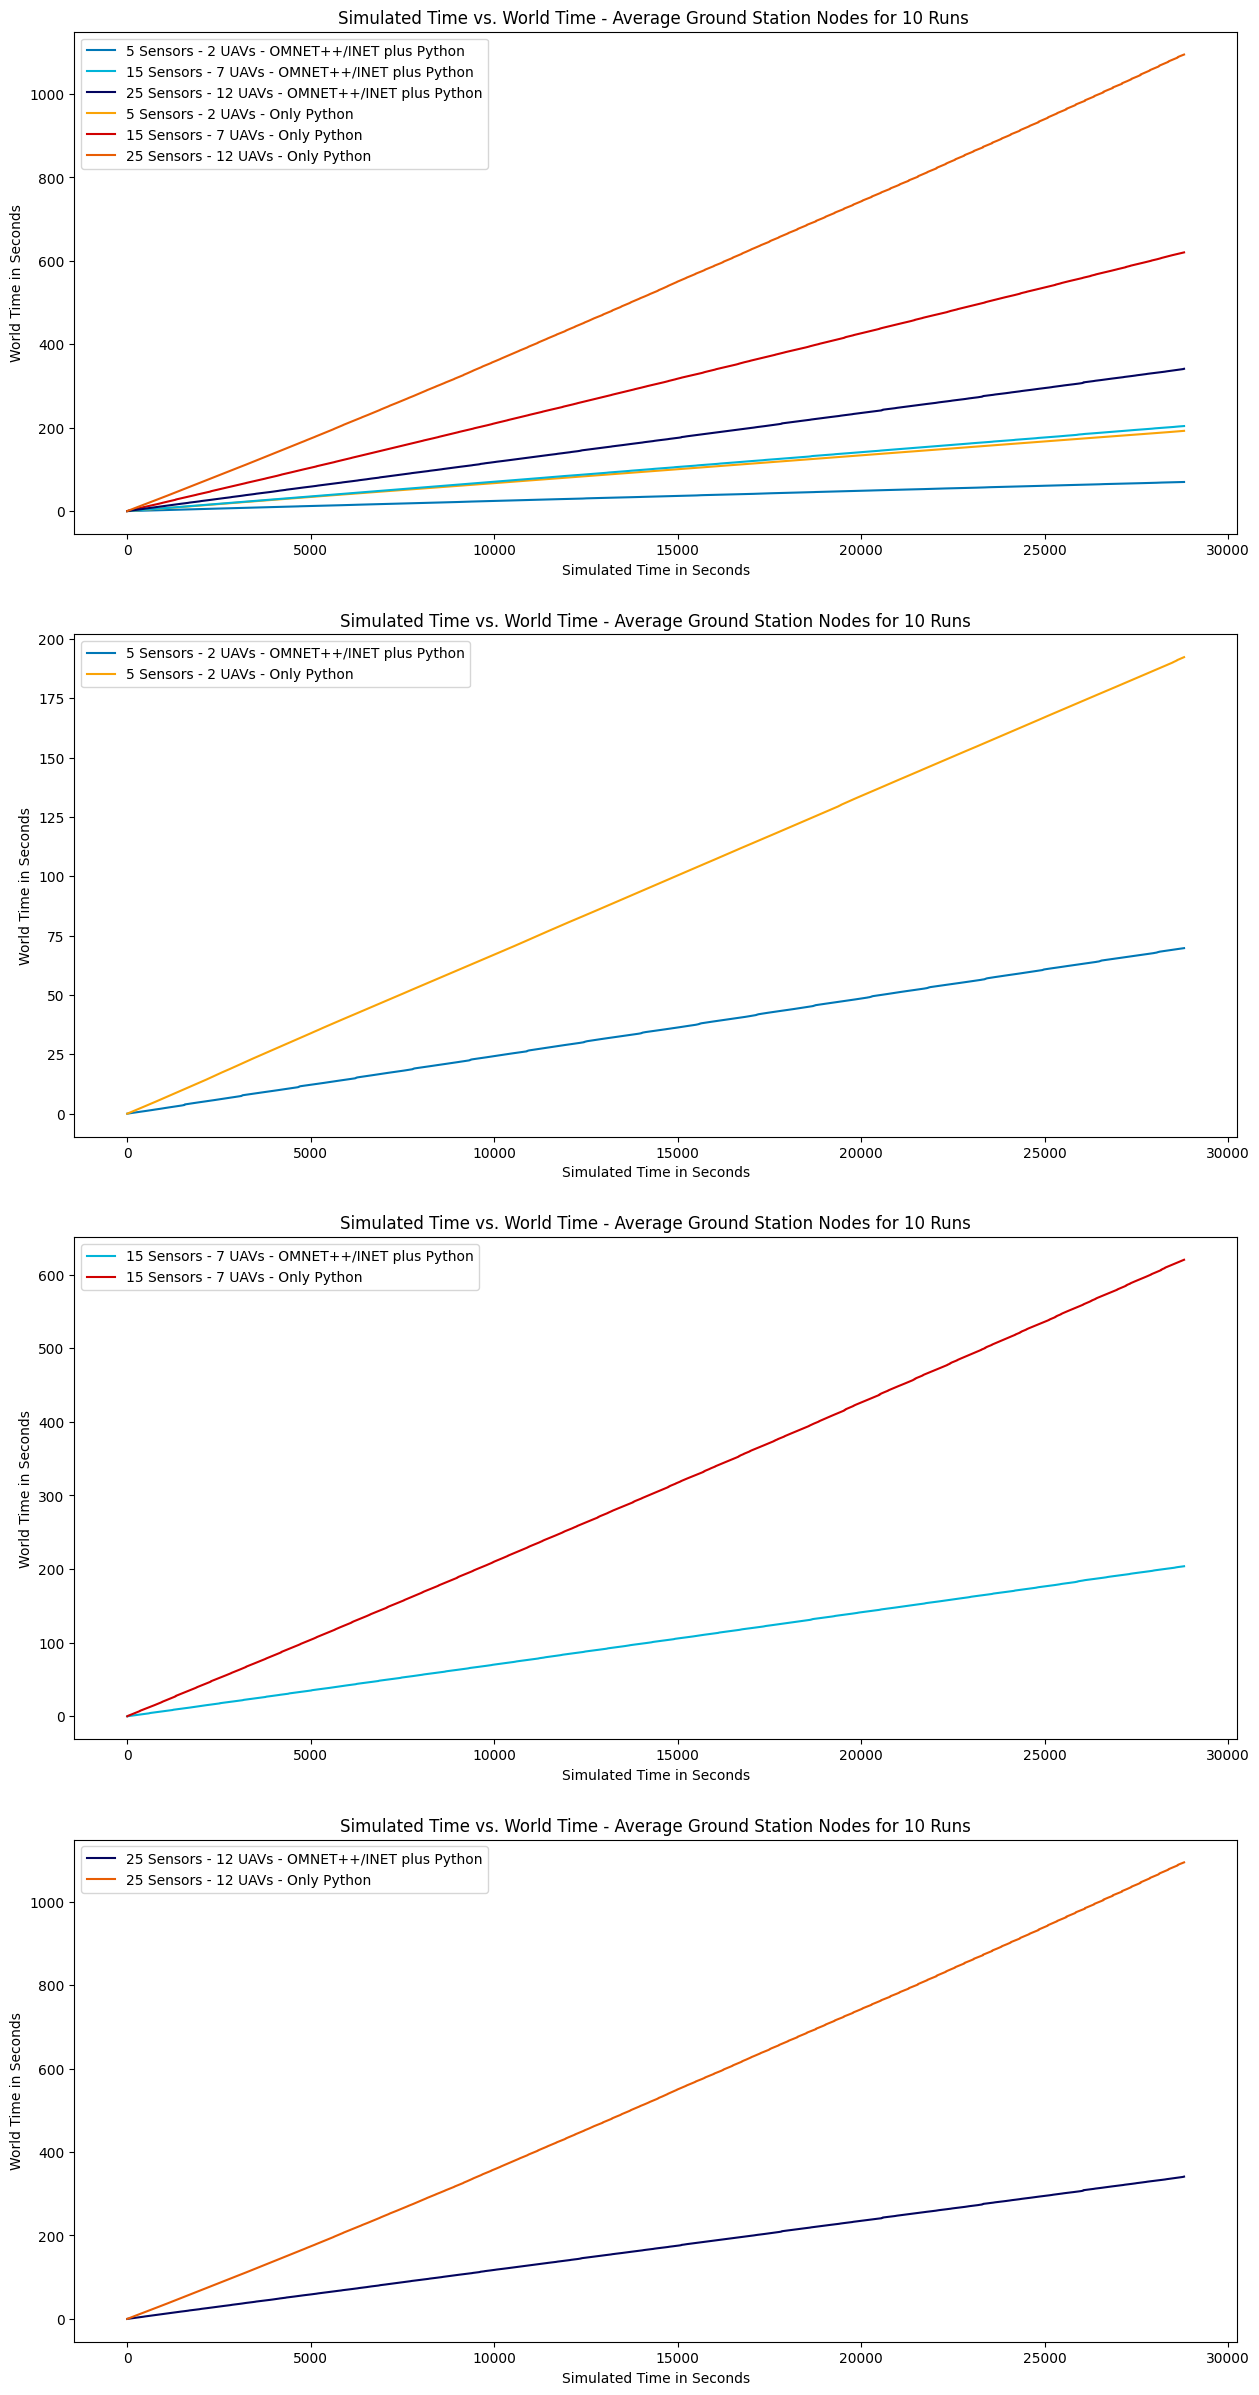

In [7]:
blue_palette = ['#0077b6', '#00b4d8','#03045e']
warm_palette = ['#faa307', '#d00000', '#e85d04']

figw, axs2 = plt.subplots(4,1, figsize=(15, 30))
folders = ["python", "cpp"]
paths = [5, 15, 25]
data_columns = ["real_time"]
rounds = [1,2,3,4,5,6,7,8,9,10]

ground_ids = {
    "python" : [2, 7, 12],
    "cpp" : [13, 28, 43],
}

for idx_path, path in enumerate(paths):

    dfs = {
        "cpp" : pd.DataFrame(),
        "python" : pd.DataFrame(),
    }

    for idx_folder, folder in enumerate(folders):
        for idx_data_column, data_column in enumerate(data_columns):
            for round in rounds:
            
                base_file_path = f"./results/{folder}/{path}/{round}/simulation_real_time__ZigZagProtocolGround_"

                ground_id = ground_ids[folder][idx_path]
                # Load dataset and rename for merge
                tmp_df = load_dataset(base_file_path + f"{ground_id}.csv")[['simulation_time', data_column]]

                min_value = tmp_df[data_column].min()
                tmp_df[data_column] -= min_value

                tmp_df = tmp_df.rename(columns={data_column: f"{data_column}_{round}"})

                if path == 5:
                    tmp_df = tmp_df.iloc[:288001]

                # Merge
                dfs[folder] = tmp_df if len(dfs[folder]) == 0 else pd.merge(dfs[folder], tmp_df, on='simulation_time', how='inner')


    for idx_folder, folder in enumerate(folders):
        columns = []
        for round in rounds:
            columns.append(f"real_time_{round}")
        
        average_series = dfs[folder][columns].mean(axis=1)
        dfs[folder]['average'] = average_series

    for key, items in dfs.items():
        color = blue_palette if 'cpp' in key else warm_palette

        label = f"{path} Sensors - {math.floor(path/2)} UAVs - {'OMNET++/INET plus Python' if key == 'cpp' else 'Only Python'}"
        # Create a combined graph
        axs2[0].plot(items.loc[:, 'simulation_time'], items.loc[:, 'average'], label=label, color=color[idx_path])
        
        if idx_path == 0:
            axs2[0].set_title(f'Simulated Time vs. World Time - Average Ground Station Nodes for 10 Runs ')
            axs2[0].set_xlabel('Simulated Time in Seconds')
            axs2[0].set_ylabel('World Time in Seconds')

        # Create a graph for each individually
        axs2[idx_path + 1].plot(items.loc[:, 'simulation_time'], items.loc[:, 'average'], label=label, color=color[idx_path])
        axs2[idx_path + 1].set_title(f'Simulated Time vs. World Time - Average Ground Station Nodes for 10 Runs')
        
        axs2[idx_path + 1].set_xlabel('Simulated Time in Seconds')
        axs2[idx_path + 1].set_ylabel('World Time in Seconds')
        axs2[idx_path + 1].legend()

axs2[0].legend()

handles, labels = axs2[0].get_legend_handles_labels()
order = [0,2,4,1,3,5]
axs2[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order])